# Bike Sharing Assignment

**Required to build a multiple linear regression model for the prediction of demand for shared bikes**

A US bike-sharing provider **BoomBikes** which provides a service where in bikes are made available for shared use to individuals on a short term basis for a price or free. The bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


Using various meteorological surveys and people's styles, the **BoomBikes** service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. **BoomBikes** aspires to understand the demand for shared bikes among the people after this ongoing (Covid-19) quarantine situation ends across the nation. 

The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

The management desires to use this understanding to see how exactly the demands vary with different features and update its  business strategy to meet the demand levels and customer's expectations and thus improve its quality of service and profit margin.

**The solution can be divided into the following:</br>**
- Reading and Understanding the data
- Visualising the Data
- Data Preparation
- Model building and evaluation
    

### 1. Reading and Understanding the Data

Let us first import NumPy and Pandas and read the day dataset

In [100]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
#import libraries
import pandas as pd
import numpy as np
#imports for Visualising the data
import sweetviz as sv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import library for data training and scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
#import libraries for model building
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
#import libraries for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
#import library for r2_score
from sklearn.metrics import r2_score

In [101]:
# Importing survey data
bs_day = pd.read_csv('day.csv')

In [102]:
# Check the head of the dataset
bs_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [103]:
# To check the null values in columns if any, the column names and column types
bs_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [104]:
# look at the sizing(number of rows and columns) of the dataset 
bs_day.shape

(730, 16)

In [105]:
# Getting better idea of features in dataset
bs_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


As we can see from above there are fields suchas **season, weekday, mnth, weathersit** where the features have numerical values. These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case. Hence we will go forward and convert them to their `categorical string values` before proceeding with model building.

In [106]:
# Assigning categorical string values to different season instead of numeric values.
# A function has been created to map the actual numbers to categorical levels.
def season_object_map(x):
    return x.map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

# Applying the function to the two columns
bs_day[['season']] = bs_day[['season']].apply(season_object_map)

In [107]:
# Validating whether the conversion is done properly or not and getting data count on the basis of season
bs_day['season'].astype('category').value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [108]:
# Assigning categorical string values to different weekday instead of numeric values.
# A function has been created to map the actual numbers to categorical levels.
def weekday_object_map(x):
    return x.map({0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'})

# Applying the function to the two columns
bs_day[['weekday']] = bs_day[['weekday']].apply(weekday_object_map)

In [109]:
# Validating whether the conversion is done properly or not and getting data count on the basis of weekday
bs_day['weekday'].astype('category').value_counts()

monday       105
saturday     105
sunday       105
friday       104
thursday     104
tuesday      104
wednesday    103
Name: weekday, dtype: int64

In [110]:
# Assigning categorical string values to different months instead of numeric values.
# A function has been created to map the actual numbers to categorical levels.
def mnth_object_map(x):
    return x.map({1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

# Applying the function to the two columns
bs_day[['mnth']] = bs_day[['mnth']].apply(mnth_object_map)

In [111]:
# Validating whether the conversion is done properly or not and getting data count on the basis of month
bs_day['mnth'].astype('category').value_counts()

aug     62
dec     62
jan     62
jul     62
mar     62
may     62
oct     62
apr     60
jun     60
nov     60
sept    60
feb     56
Name: mnth, dtype: int64

In [112]:
# Assigning categorical string values to different weather instead of numeric values.
# A function has been created to map the actual numbers to categorical levels.
def weathersit_object_map(x):
    #lets abbrevate the categorical strings to aid reading the dataset
    #1: Clear, Few clouds, Partly cloudy, Partly cloudy ---> Clear to Cloudy
    #2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ---> Mist
    #3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds ---> Light Snow/Rain
    #4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog ---> Heavy Snow/Rain
    return x.map({1: 'Clear to Cloudy', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'})

# Applying the function to the two columns
bs_day[['weathersit']] = bs_day[['weathersit']].apply(weathersit_object_map)

In [113]:
# Validating whether the conversion is done properly or not and getting data count on the basis of weathersit
bs_day['weathersit'].astype('category').value_counts()

Clear to Cloudy    463
Mist               246
Light Snow/Rain     21
Name: weathersit, dtype: int64

Now lets check the data after the change from numerical values to Categorical string values

In [114]:
bs_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,0,saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,monday,1,Clear to Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,tuesday,1,Clear to Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,wednesday,1,Clear to Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Lets also check the year field as this data is collected for year 2018 and 2019. 

In [115]:
# year (0: 2018, 1:2019)
bs_day['yr'].astype('category').value_counts()

0    365
1    365
Name: yr, dtype: int64

In [116]:
# Converting date to datetime format
bs_day['dteday']=bs_day['dteday'].astype('datetime64')

In [117]:
bs_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [118]:
#Auto EDA
sweet_report = sv.analyze(bs_day)
sweet_report.show_html('sweet_report.html')

Done! Use 'show' commands to display/save.   |█████████████████████████████████████████| [100%]   00:00 -> (00:00 left)

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

#### Visualising Numeric Variables

Let's make a distplot of all the numeric variables. A distplot plots an approximate probability density for that rating bucket. And the curve (or the KDE) that gets drawn over the distribution is the approximate probability density curve.</br>
**Notice:** </br>
casual  and registered is redundant as cnt captures the number of users  </br>
yr, workingday,holiday are either 1 or 0 making it not ideal for ploting the distribution

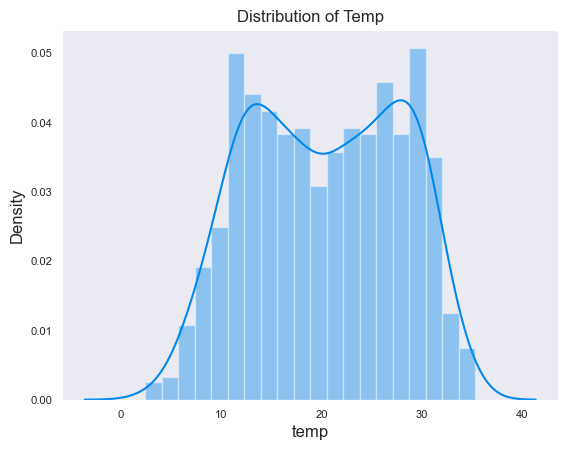

In [119]:
sns.set_style("dark")
sns.distplot(bs_day.temp, bins=20)
plt.title("Distribution of Temp", fontsize=12)
plt.show()

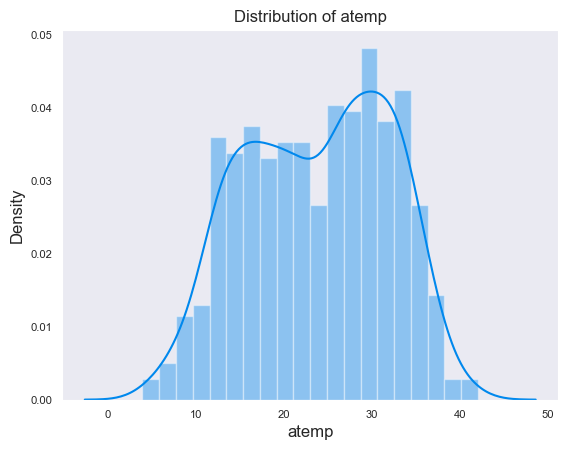

In [120]:
sns.set_style("dark")
sns.distplot(bs_day.atemp, bins=20)
plt.title("Distribution of atemp", fontsize=12)
plt.show()

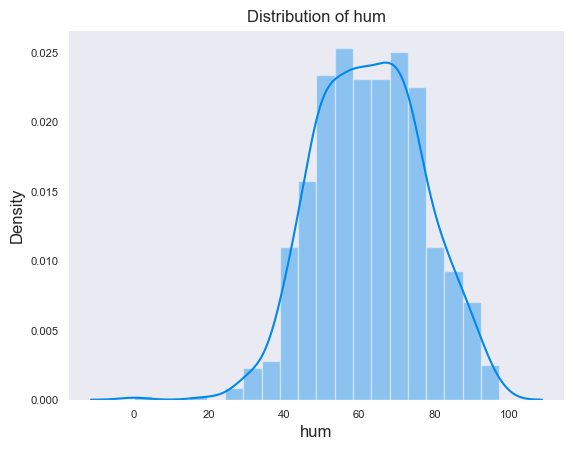

In [121]:
sns.set_style("dark")
sns.distplot(bs_day.hum, bins=20)
plt.title("Distribution of hum", fontsize=12)
plt.show()

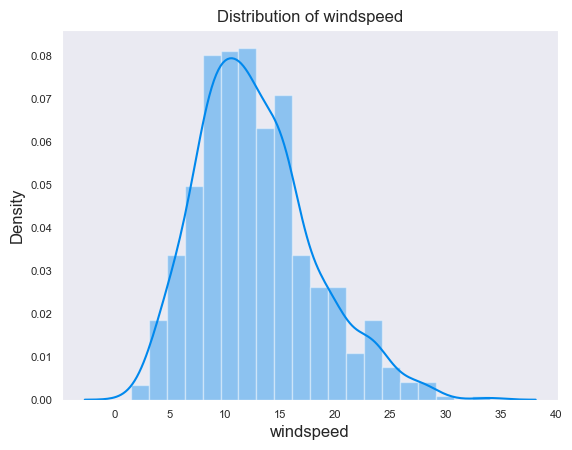

In [122]:
sns.set_style("dark")
sns.distplot(bs_day.windspeed, bins=20)
plt.title("Distribution of windspeed", fontsize=12)
plt.show()

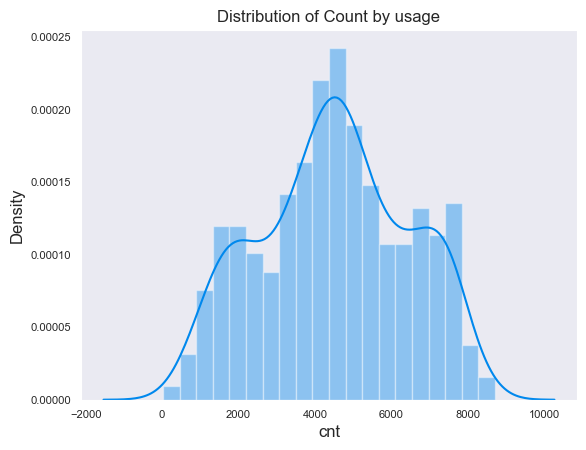

In [123]:
sns.set_style("dark")
sns.distplot(bs_day.cnt, bins=20)
plt.title("Distribution of Count by usage", fontsize=12)
plt.show()

**Observation:**
- The usage of bikes based on atemp and temp are similar and hence only one feature can be used.
- The see the usage of bikes increases when it is less windy in the range 5-25
- On an average 4000 bikes are used

#### Visualising Categorical Variables
As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

In [124]:
#Checking the categorical values
# All categorical variables in the dataset
bs_day_categorical=bs_day.select_dtypes(exclude=['float64','datetime64','int64'])
bs_day_categorical.head()

,season,mnth,weekday,weathersit
0,spring,jan,saturday,Mist
1,spring,jan,sunday,Mist
2,spring,jan,monday,Clear to Cloudy
3,spring,jan,tuesday,Clear to Cloudy
4,spring,jan,wednesday,Clear to Cloudy


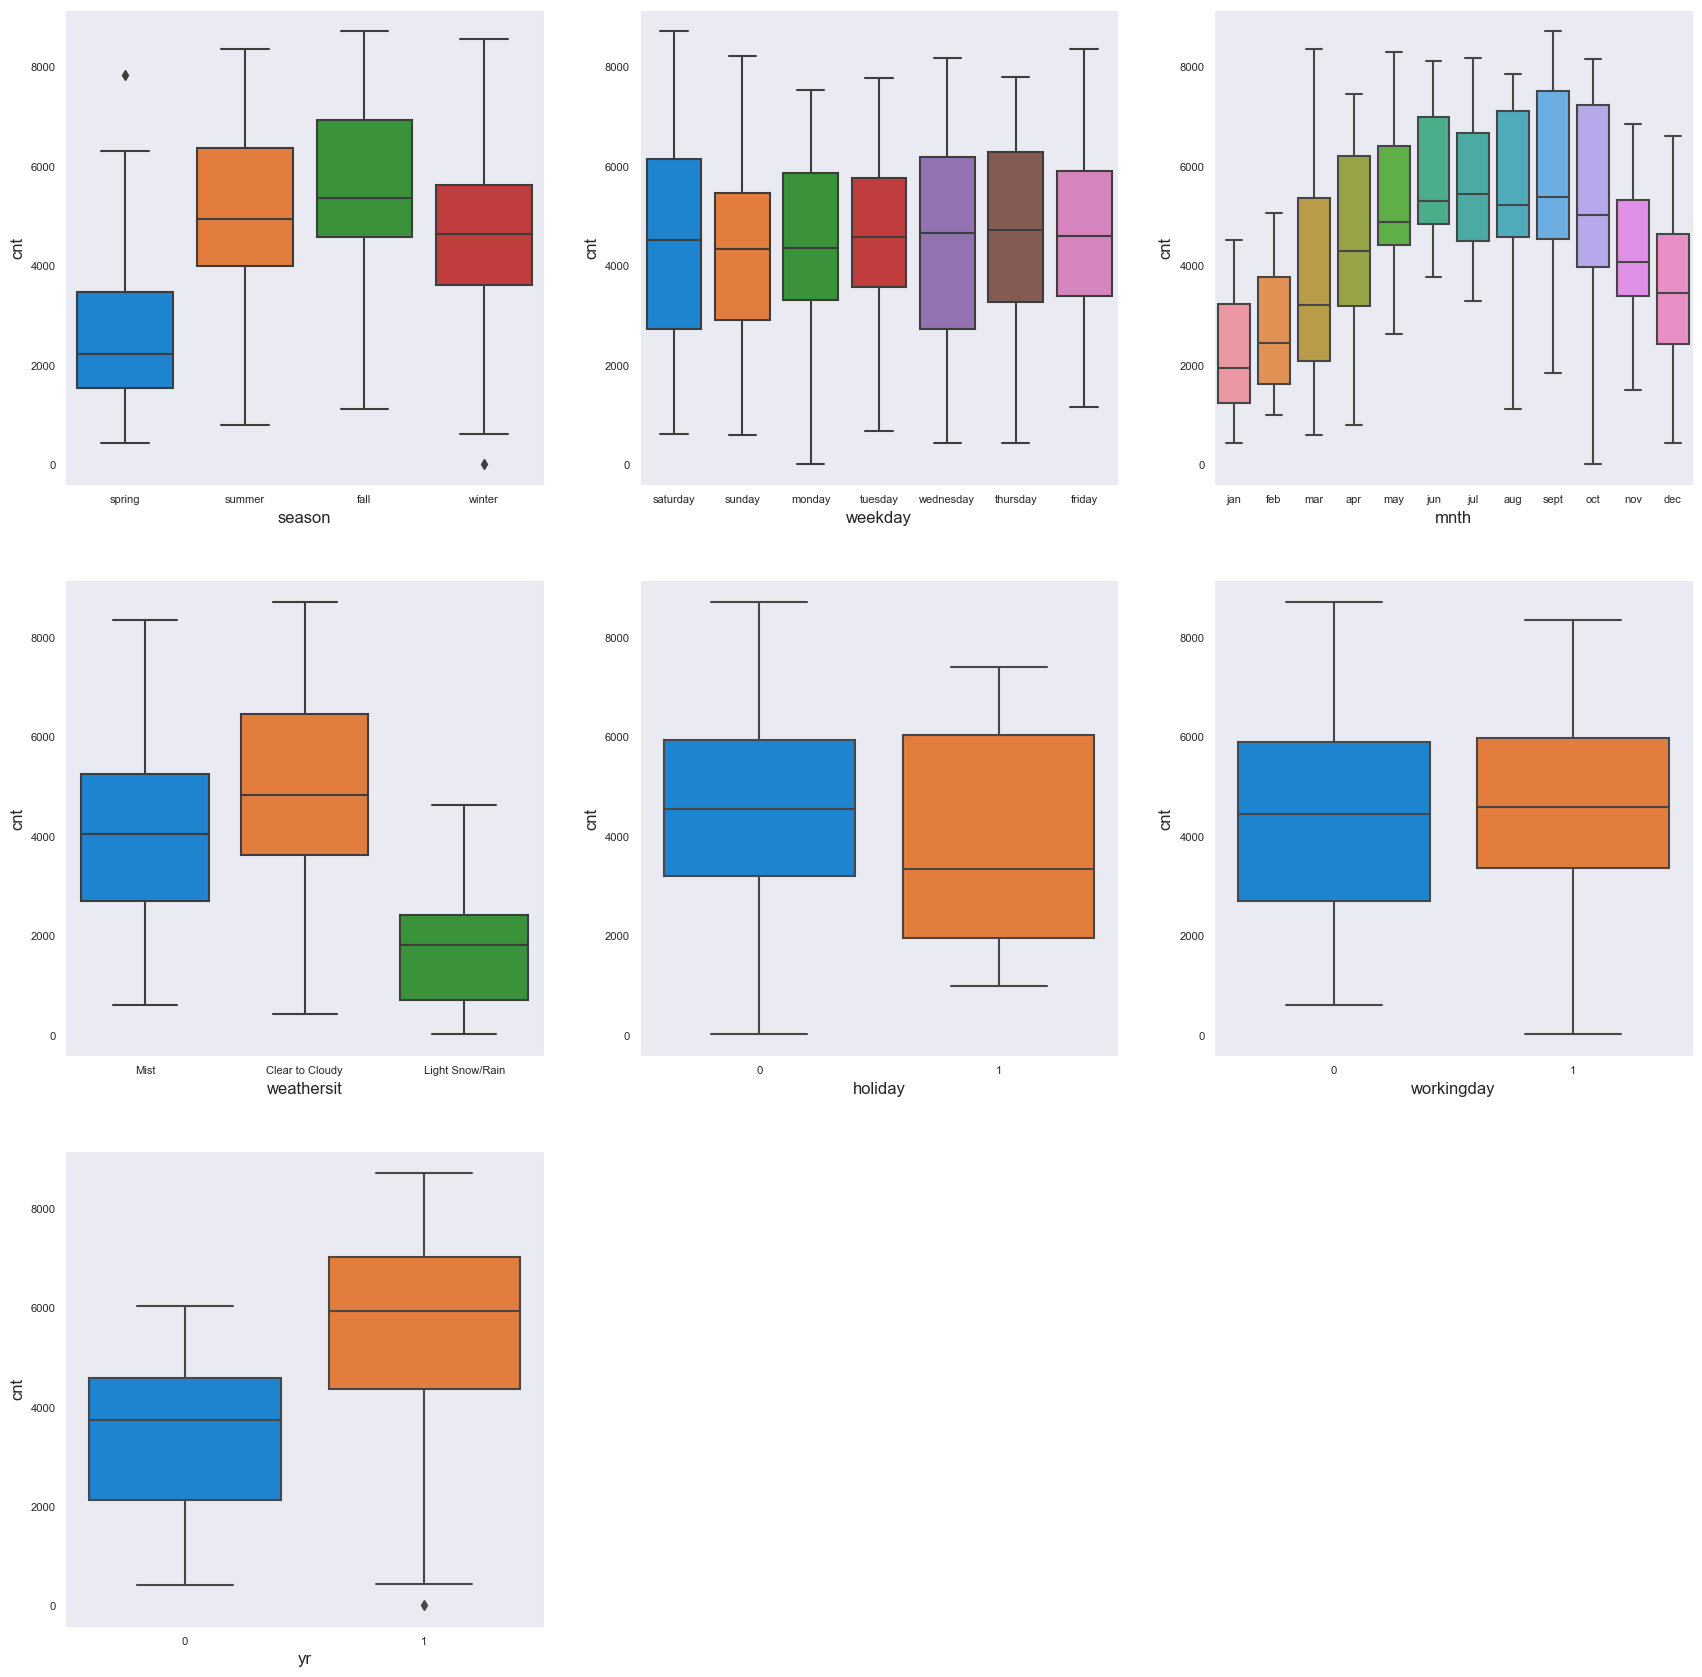

In [125]:
# Making boxplot to compare the relation between the cnt and the categorical values
plt.figure(figsize=(21, 21))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bs_day)
plt.subplot(3,3,2)
sns.boxplot(x = 'weekday', y = 'cnt', data = bs_day)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bs_day)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bs_day)
plt.subplot(3,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bs_day)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bs_day)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bs_day)
plt.show()

**Observation:**
- The Usage of bikes increase in **fall** followed by **summer**. There is significant reduction in usage of bike in **spring**.
- Based on analysis of boxplot of mean usage on weekday we see they are used in same proportion.
- The increase in usage during **september** followed by august and october confirms the **season** boxplot observation above.
- There is dependency on weather too as we see people tend to use bike during **Clear to Cloudy** followed by during **Misty** condition. They tend to use less bike during Light Rain/Snow. There is 0 usage of bike during Heavy Rain/Snow.
- The mean of usage during not a holiday is higher.
- The usage of bikes during working and non working day does not have an impact as bikes are used equally on both days
- The usage of bikes in 2019 has increased from 2018 which is a good indicator.

#### Visualising Numeric Variables
Let's make a pairplot of all the numeric variables</br>


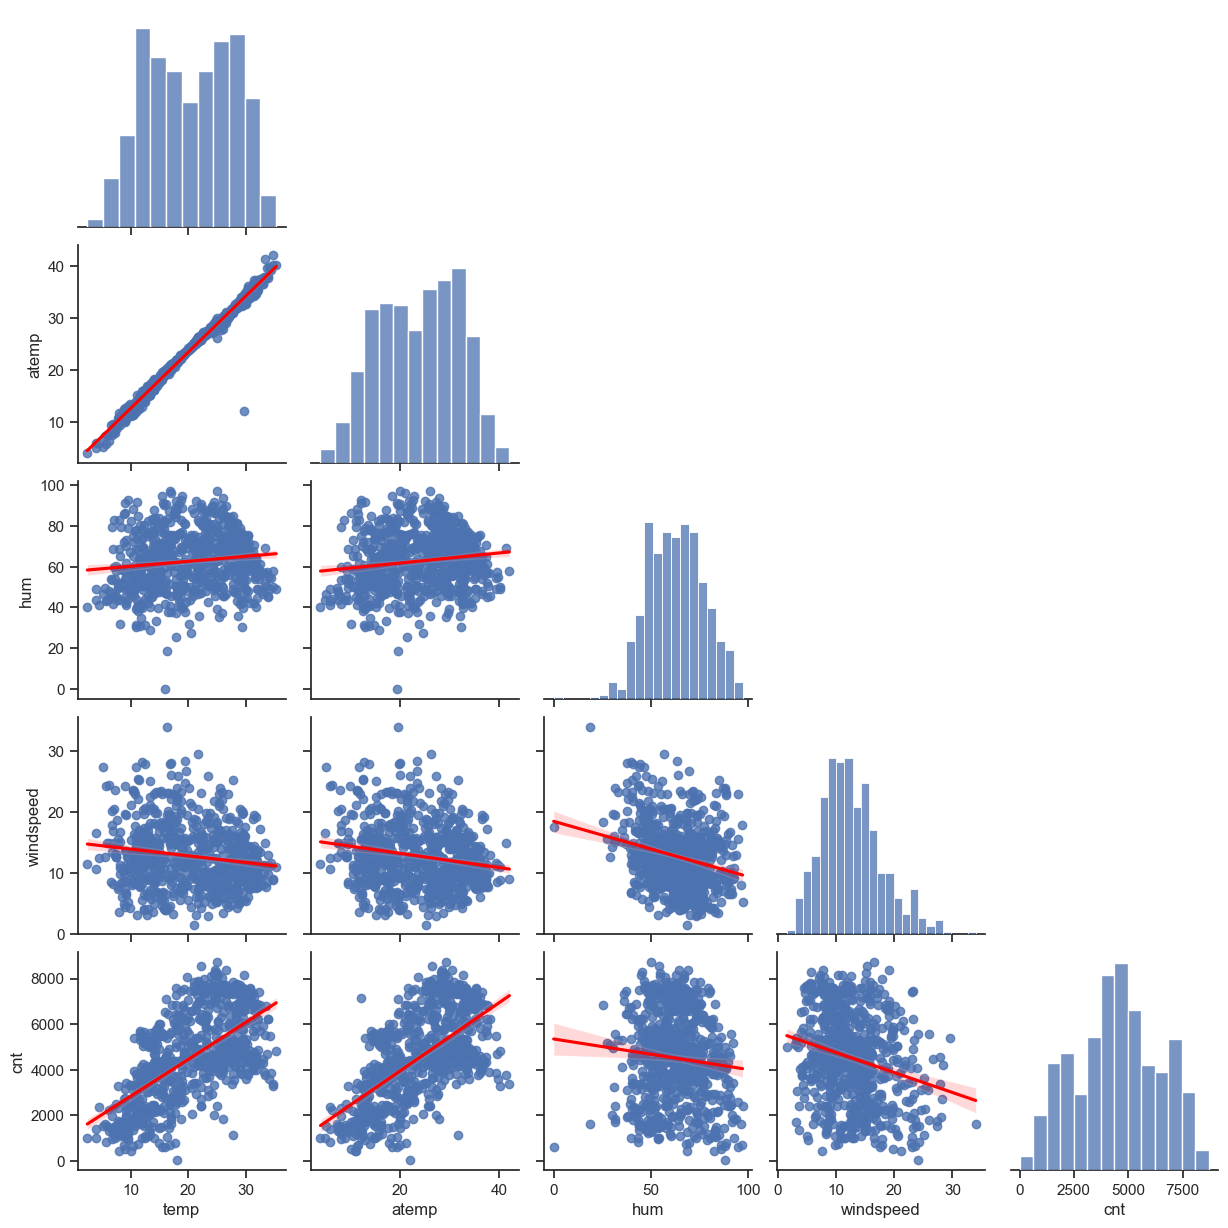

In [126]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data=bs_day,vars=["temp","atemp","hum","windspeed","cnt"], kind="reg", corner=True, plot_kws={'line_kws':{'color':'red'}})
plt.show()

**Observation:**
- There is possitive correlation between atemp, temp and cnt.
- There is negative correlation to windspeed as we can see in plot above.
- There is slight negative correlation to humudity but it does not seem significant.
- Notice the temp and atemp independent variables are highly correlated.

#### Correlation Matrix
Here, you can create a correlation matrix to re-iterate the pair plot observation</br>
Here we will remove the `atemp` feature as it is same as temp from above find

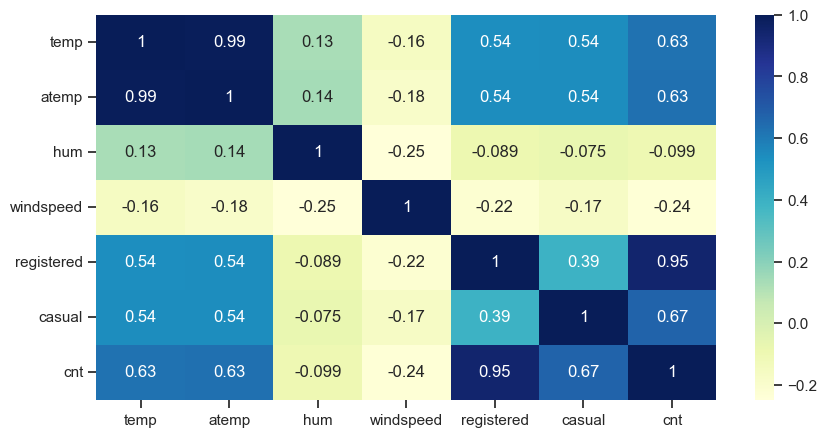

In [127]:
# Re-iterating the pairplot observation using heatmap, removing temp as it is similar data to atemp
day_corr = bs_day[["temp","atemp","hum","windspeed", "registered", "casual","cnt"]].corr()
fig,ax= plt.subplots()
fig.set_size_inches(10,5)
sns.heatmap(data=day_corr, cmap="YlGnBu", annot=True )
plt.show()

Corelation between independent variables
- `Since registered and casual add upto cnt we can remove them from the visualizing list to avoid multicollinearity `  </br>
- from above heatmap atemp is highly corelated to temp.

In [128]:
#Removing the highly corelated features
#atemp and temp are corelated, atemp can be discarded
#registered and casual add up to cnt hence we can use cnt and discard registered and casual
#mnth is corelated to season, hence can be discarded
#weekday does not have much impact on prediction based on boxplot and sweetviz all days of week have 14% prediction.
#so we can remove this to avoid over crowding our train data
bs_day=bs_day.drop(columns=["atemp", "registered", "casual","mnth", "holiday", "workingday"], inplace=False, axis=1)

In [129]:
bs_day.head()

,instant,dteday,season,yr,weekday,weathersit,temp,hum,windspeed,cnt
0,1,2018-01-01,spring,0,saturday,Mist,14.110847,80.5833,10.749882,985
1,2,2018-02-01,spring,0,sunday,Mist,14.902598,69.6087,16.652113,801
2,3,2018-03-01,spring,0,monday,Clear to Cloudy,8.050924,43.7273,16.636703,1349
3,4,2018-04-01,spring,0,tuesday,Clear to Cloudy,8.200000,59.0435,10.739832,1562
4,5,2018-05-01,spring,0,wednesday,Clear to Cloudy,9.305237,43.6957,12.522300,1600


## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.
Note that we had not included 'yr', 'mnth', 'holiday', 'weekday' and 'workingday' as object variables in the initial data exploration steps so as to avoid too many dummy variables creation. They have binary values: 0s and 1s in them which have specific meanings associated with them.

In [130]:
# Subset all categorical variables
bs_day_categorical=bs_day.select_dtypes(include=['object'])

In [131]:
bs_day_categorical.head()

,season,weekday,weathersit
0,spring,saturday,Mist
1,spring,sunday,Mist
2,spring,monday,Clear to Cloudy
3,spring,tuesday,Clear to Cloudy
4,spring,wednesday,Clear to Cloudy


#### Dummy Variables
The variable `season`,`mnth`,`weekday` and `weathersit` have different levels. We need to convert these levels into integers. 

For this, we will use something called `dummy variables`.

In [132]:
# Convert into dummies
# Let's drop the first column from resultant bs_day_categorical column's  using 'drop_first = True'
bs_day_dummies = pd.get_dummies(bs_day_categorical, drop_first=True)
bs_day_dummies.head()

,season_spring,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Light Snow/Rain,weathersit_Mist
0,1,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,1,0,0


In [133]:
# Drop categorical variable columns
bs_day = bs_day.drop(list(bs_day_categorical.columns), axis=1)

In [134]:
# Concatenate dummy variables with the original dataframe
bs_day = pd.concat([bs_day, bs_day_dummies], axis=1)

In [135]:
# Let's check the first few rows
bs_day.head()

,instant,dteday,yr,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Light Snow/Rain,weathersit_Mist
0,1,2018-01-01,0,14.110847,80.5833,10.749882,985,1,0,0,0,1,0,0,0,0,0,1
1,2,2018-02-01,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,1,0,0,0,0,1
2,3,2018-03-01,0,8.050924,43.7273,16.636703,1349,1,0,0,1,0,0,0,0,0,0,0
3,4,2018-04-01,0,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0,0,0
4,5,2018-05-01,0,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,1,0,0


In [136]:
# Drop the 'instant' and 'dteday' column as they of not any use to us for the analysis
bs_day=bs_day.drop(['instant','dteday'], axis = 1, inplace = False)
bs_day.head()

,yr,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Light Snow/Rain,weathersit_Mist
0,0,14.110847,80.5833,10.749882,985,1,0,0,0,1,0,0,0,0,0,1
1,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,1,0,0,0,0,1
2,0,8.050924,43.7273,16.636703,1349,1,0,0,1,0,0,0,0,0,0,0
3,0,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0,0,0
4,0,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,1,0,0


## 4. Model Building and Evaluation

Let's start building the model. The first step to model building is the usual test-train split. So let's perform that

In [137]:
# Random state is set at 100, specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bs_day_train, bs_day_test = train_test_split(bs_day, train_size = 0.7, test_size = 0.3, random_state = 100)

In [138]:
#Checking train data
bs_day_train

,yr,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Light Snow/Rain,weathersit_Mist
653,1,19.201653,55.8333,12.208807,7534,0,0,1,0,0,0,0,1,0,0,0
576,1,29.246653,70.4167,11.083475,7216,0,0,0,0,0,0,0,1,0,0,0
426,1,16.980847,62.1250,10.792293,4066,1,0,0,0,1,0,0,0,0,0,1
728,1,10.489153,48.3333,23.500518,1796,1,0,0,0,0,1,0,0,0,0,0
482,1,15.443347,48.9583,8.708325,4220,0,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,29.554153,58.7917,13.916771,6664,0,1,0,1,0,0,0,0,0,0,1
578,1,30.852500,65.9583,8.666718,7261,0,0,0,0,0,0,1,0,0,0,0
53,0,9.091299,42.3043,6.305571,1917,1,0,0,0,0,0,0,0,1,0,0
350,0,10.591653,56.0833,16.292189,2739,0,0,1,0,1,0,0,0,0,0,1


In [139]:
#Checking test data
bs_day_test

,yr,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Light Snow/Rain,weathersit_Mist
184,0,29.793347,63.7917,5.459106,6043,0,0,0,1,0,0,0,0,0,0,1
535,1,32.082500,59.2083,7.625404,6211,0,1,0,0,0,0,0,0,1,0,0
299,0,19.270000,81.2917,13.250121,2659,0,0,1,0,0,0,1,0,0,0,1
221,0,31.433347,42.4167,13.417286,4780,0,0,0,0,0,0,0,0,1,0,0
152,0,29.315000,30.5000,19.583229,4968,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,10.899153,68.7917,11.791732,2947,1,0,0,0,0,1,0,0,0,0,1
702,1,19.509153,73.3750,11.666643,6606,0,0,1,0,0,0,0,1,0,0,0
127,0,21.661653,63.1667,5.000712,4333,0,1,0,0,0,1,0,0,0,0,0
640,1,26.957500,79.3750,4.458569,7572,0,0,1,0,0,0,0,0,1,0,1


### Scaling

Now that we have done the test-train split, we need to scale the variables for better interpretability. But we only need the scale the numeric columns and not the dummy variables. Let's take a look at the list of numeric variables we had created in the beginning. Also, the scaling has to be done only on the train dataset as you don't want it to learn anything from the test data.
`MinMax scaling brings all of the data in the range of 0 and 1.` 

In [140]:
scaler = MinMaxScaler()

In [141]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
var = ['temp', 'hum', 'windspeed','cnt']

bs_day_train[var] = scaler.fit_transform(bs_day_train[var])

In [142]:
bs_day_train

,yr,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Light Snow/Rain,weathersit_Mist
653,1,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,1,0,0,0
576,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0
426,1,0.442393,0.640189,0.255342,0.465255,1,0,0,0,1,0,0,0,0,0,1
728,1,0.245101,0.498067,0.663106,0.204096,1,0,0,0,0,1,0,0,0,0,0
482,1,0.395666,0.504508,0.188475,0.482973,0,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0.824514,0.605840,0.355596,0.764151,0,1,0,1,0,0,0,0,0,0,1
578,1,0.863973,0.679690,0.187140,0.832835,0,0,0,0,0,0,1,0,0,0,0
53,0,0.202618,0.435939,0.111379,0.218017,1,0,0,0,0,0,0,0,1,0,0
350,0,0.248216,0.577930,0.431816,0.312586,0,0,1,0,1,0,0,0,0,0,1


In [143]:
bs_day_train.describe()

,yr,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Light Snow/Rain,weathersit_Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


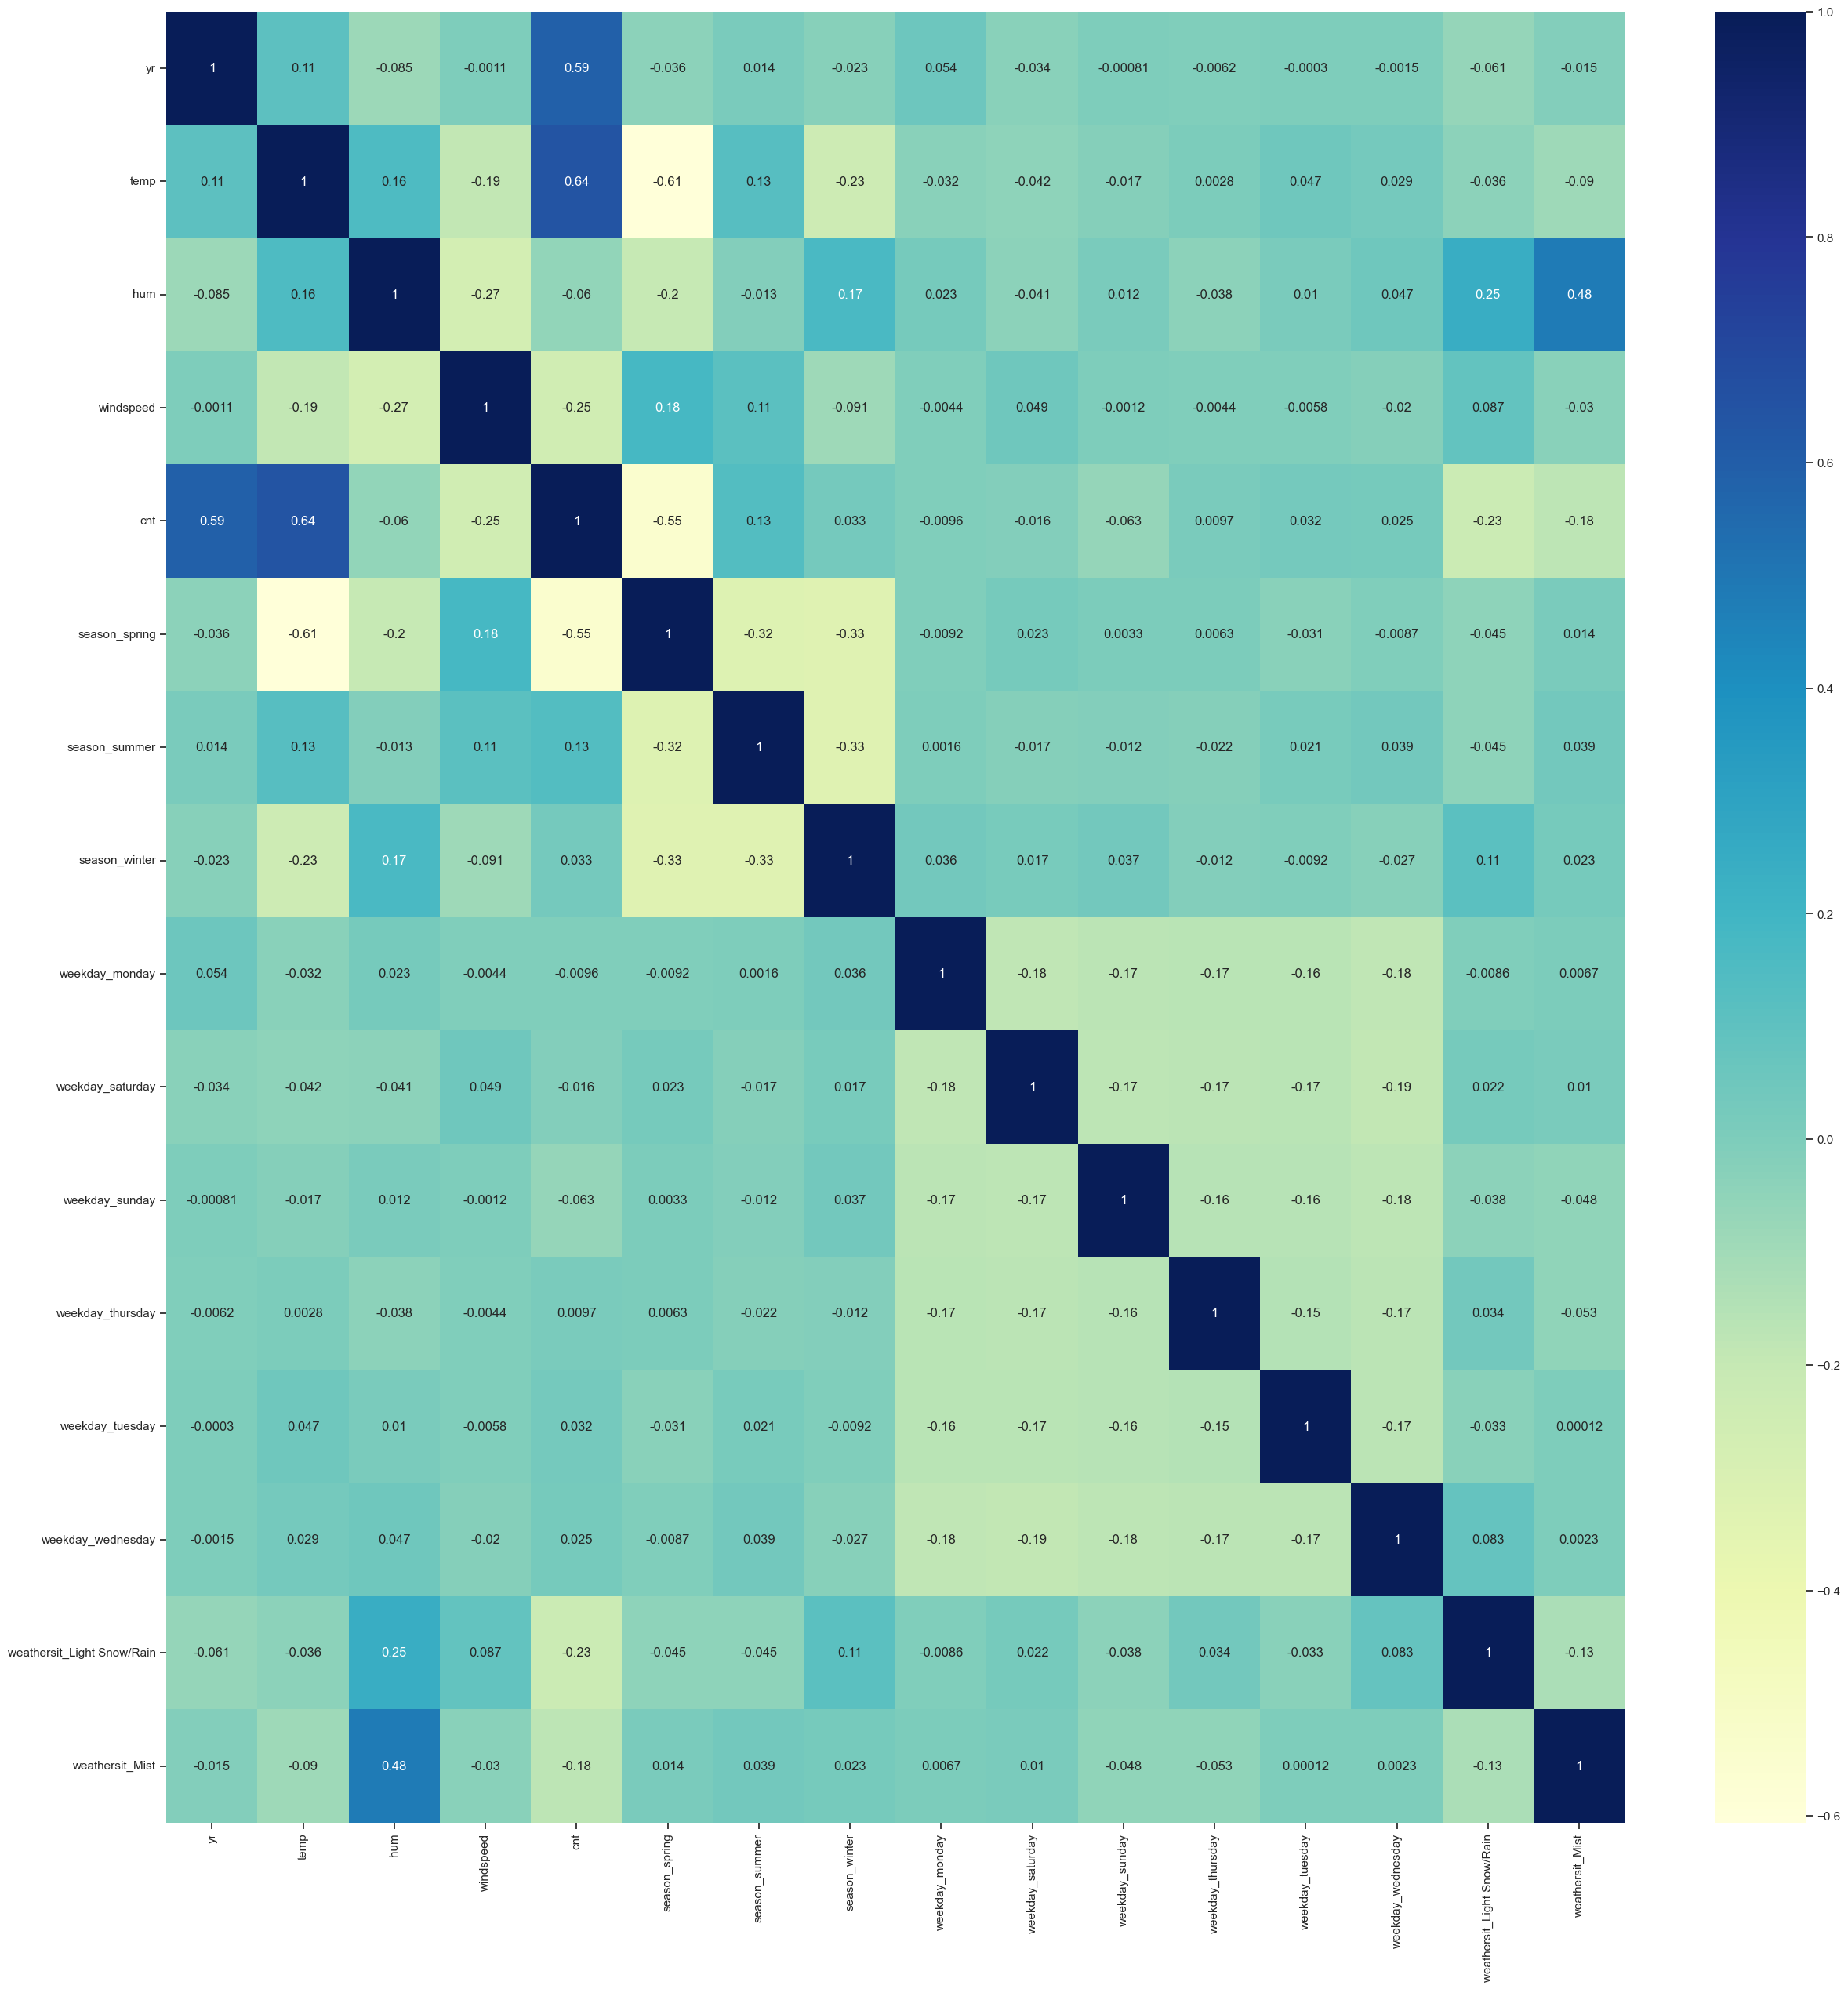

In [144]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 30))
sns.heatmap(bs_day_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

**Observation**: 
- The feature cnt and year/temp has good correlation  .
- The feature windspped and hum is negatively correlated to cnt.

As you might have noticed, `temp` seems to the correlated to `cnt` the most, after 'casual' and 'registered'. Let's see a pairplot for `temp` vs `cnt`.

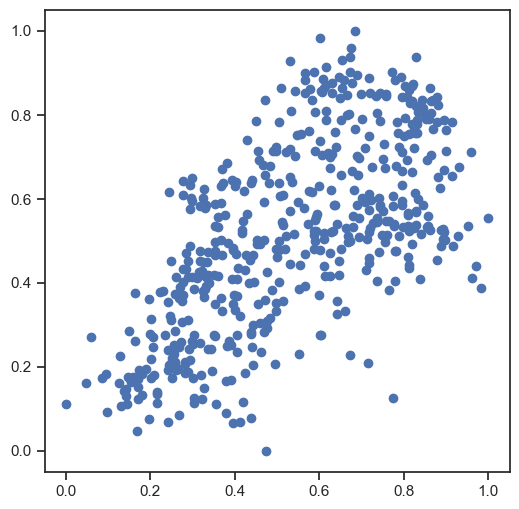

In [145]:
plt.figure(figsize=[6,6])
plt.scatter(bs_day_train.temp, bs_day_train.cnt)
plt.show()

### Dividing into X and Y sets for the model building

In [146]:
y_train = bs_day_train.pop('cnt')
X_train = bs_day_train

### Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [147]:
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()
# Check the parameters obtained
lr.params

const                         0.299001
yr                            0.232465
temp                          0.493714
hum                          -0.124998
windspeed                    -0.181709
season_spring                -0.076244
season_summer                 0.043535
season_winter                 0.088357
weekday_monday               -0.031484
weekday_saturday              0.000963
weekday_sunday               -0.055471
weekday_thursday             -0.009052
weekday_tuesday              -0.017494
weekday_wednesday            -0.001658
weathersit_Light Snow/Rain   -0.248013
weathersit_Mist              -0.057229
dtype: float64

In [148]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [149]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 0.23246497  0.49371361 -0.1249984  -0.18170947 -0.07624399  0.04353458
  0.08835653 -0.0314843   0.00096349 -0.05547143 -0.00905169 -0.01749372
 -0.00165795 -0.24801305 -0.05722867]
0.29900135841312386


In [150]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     161.8
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          1.51e-179
Time:                        08:51:41   Log-Likelihood:                 491.65
No. Observations:                 510   AIC:                            -951.3
Df Residuals:                     494   BIC:                            -883.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

This model has an Adjusted R-squared value of **82.6%**  with **15 variable** which seems pretty good.

In [151]:
X_train_model=X_train_lm.drop('const',axis=1)

In [152]:
#Calculate the VIF for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_model.columns
vif['VIF'] = [variance_inflation_factor(X_train_model.values, i) for i in range(X_train_model.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,28.68
1,temp,15.37
3,windspeed,4.73
4,season_spring,3.88
6,season_winter,3.15
14,weathersit_Mist,2.34
5,season_summer,2.29
12,weekday_wednesday,2.20
7,weekday_monday,2.12
8,weekday_saturday,2.11


Now let us use RFE - **Recursive feature Elimination** to test the same

### Recursive Feature Elimination
Recursive Feature Elimination is a feature selection algorithm.

A machine learning dataset for classification or regression is comprised of rows and columns, like an excel spreadsheet. Rows are often referred to as samples and columns are referred to as features, e.g. features of an observation in a problem domain.

**Notice**
Now, you have close to 15 features. It is obviously not recommended to manually eliminate these features. So let's now build a model using recursive feature elimination to select features. We'll first start off with an arbitrary number of features (15 seems to be a good number to begin with), and then use the `statsmodels` library to build models using the shortlisted features (this is also because `SKLearn` doesn't have `Adjusted R-squared` that `statsmodels` has).

In [153]:
rfelr = LinearRegression()
#Use RFE to remove not significant features from the initial model.
bs_day_rfe = RFE(rfelr,  n_features_to_select=10)
bs_day_fit = bs_day_rfe.fit(X_train, y_train)
 

In [154]:
# Print the Top 10 selection column names whcih RFE says are good
list(zip(X_train.columns, bs_day_rfe.support_,bs_day_rfe.ranking_))

[('yr', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weekday_monday', False, 2),
 ('weekday_saturday', False, 6),
 ('weekday_sunday', True, 1),
 ('weekday_thursday', False, 4),
 ('weekday_tuesday', False, 3),
 ('weekday_wednesday', False, 5),
 ('weathersit_Light Snow/Rain', True, 1),
 ('weathersit_Mist', True, 1)]

In [155]:
rfe_columns = X_train.columns[bs_day_rfe.support_]

### Build model using statmodel


In [156]:
X_train_rfe = X_train[rfe_columns]
X_train_rfe_lm = sm.add_constant(X_train_rfe)

lr_rfe = sm.OLS(y_train, X_train_rfe_lm).fit()

In [157]:
lr_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.1
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          6.97e-184
Time:                        08:51:42   Log-Likelihood:                 488.13
No. Observations:                 510   AIC:                            -954.3
Df Residuals:                     499   BIC:                            -907.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2916      0.035      8.233      0.000       0.222       0.361
yr                             0.2311      0.008     27.342      0.000       0.215       0.248
temp                           0.4967      0.034     14.399      0.000       0.429       0.564
hum                           -0.1312      0.039     -3.357      0.001      -0.208      -0.054
windspeed                     -0.1824      0.027     -6.807      0.000      -0.235      -0.130
season_spring                 -0.0751      0.021     -3.635      0.000      -0.116      -0.035
season_summer                  0.0435      0.014      3.135      0.002       0.016       0.071
season_winter                  0.0882      0.017      5.208      0.000       0.055       0.121
weekday_sunday                -0.0455      0.012     -3.807      0.000      -0.069      -0.022
weathersit_Light Snow/Rain    -0.2443      0.027     -8.895      0.000      -0.298      -0.190
weathersit_Mist               -0.0555      0.011     -5.061      0.000      -0.077      -0.034
==============================================================================
Omnibus:                       78.128   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.321
Skew:                          -0.730   Prob(JB):                     4.34e-50
Kurtosis:                       5.927   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observation** 
- The adjusted R squared is **82.5% for 10 variables** which is great
- We will check **VIF** value too


Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [158]:
X_train_rfe_model=X_train_rfe_lm.drop('const',axis=1)

In [159]:
#Calculate the VIF for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_model.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_model.values, i) for i in range(X_train_rfe_model.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,27.18
1,temp,14.79
3,windspeed,4.64
4,season_spring,3.70
6,season_winter,3.05
9,weathersit_Mist,2.29
5,season_summer,2.24
0,yr,2.07
8,weathersit_Light Snow/Rain,1.24
7,weekday_sunday,1.18


### **Since  hum VIF value is 27 which is greater and we can remove this and check the outcome.**

In [160]:
X_train_rfe = X_train[rfe_columns]
X_train_rfe = X_train_rfe.drop(columns=["hum"], axis=1, inplace=False)
X_train_rfe_lm = sm.add_constant(X_train_rfe)

lr_rfe = sm.OLS(y_train, X_train_rfe_lm).fit()

We can see that the equation of our best fitted line is:

$ cnt = 0.2342  \times  yr + 0.4689  \times  temp +  (-0.1559) \times windspeed + (-0.0824) \times season_spring + 0.0388 \times season_summer + 0.0766 \times season_winter + (-0.0480) \times weekday_sunday +  (-0.2809) \times weathersit_Light Snow/Rain + (-0.0770) \times weathersit_Mist  $

In [161]:
lr_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     261.2
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          1.08e-182
Time:                        08:51:43   Log-Likelihood:                 482.44
No. Observations:                 510   AIC:                            -944.9
Df Residuals:                     500   BIC:                            -902.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2257      0.030      7.580      0.000       0.167       0.284
yr                             0.2342      0.008     27.602      0.000       0.218       0.251
temp                           0.4689      0.034     13.861      0.000       0.402       0.535
windspeed                     -0.1559      0.026     -6.027      0.000      -0.207      -0.105
season_spring                 -0.0824      0.021     -3.968      0.000      -0.123      -0.042
season_summer                  0.0388      0.014      2.784      0.006       0.011       0.066
season_winter                  0.0766      0.017      4.574      0.000       0.044       0.110
weekday_sunday                -0.0480      0.012     -3.986      0.000      -0.072      -0.024
weathersit_Light Snow/Rain    -0.2809      0.025    -11.029      0.000      -0.331      -0.231
weathersit_Mist               -0.0770      0.009     -8.547      0.000      -0.095      -0.059
==============================================================================
Omnibus:                       75.688   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              214.299
Skew:                          -0.716   Prob(JB):                     2.92e-47
Kurtosis:                       5.835   Cond. No.                         17.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observation** This model has an Adjusted R-squared value of **82.1%** with **9 variable** which seems pretty good.</br> And we can see we dont have any multi collinarity

In [162]:
X_train_rfe_model=X_train_rfe_lm.drop('const',axis=1)

In [163]:
#Calculate the VIF for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_model.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_model.values, i) for i in range(X_train_rfe_model.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.59
1,temp,3.62
0,yr,2.07
3,season_spring,1.96
4,season_summer,1.79
5,season_winter,1.63
8,weathersit_Mist,1.53
6,weekday_sunday,1.17
7,weathersit_Light Snow/Rain,1.08


All the VIF values and p-values seem to be in the permissible range now. Also the `Adjusted R-squared` value has dropped from `82.5%` with **10 variables** to just `82.1%` using **9 variables**. This model is explaining most of the variance without being too complex. So let's proceed with this model.

`The benefit of using RFE was to fetch selector variables and produce similar results with ease of removal of variable using recursive feature elimination module of python`

### Residual Analysis

Before we make predictions on the test set, let's first analyse the residuals.

In [164]:
y_train_cnt = lr_rfe.predict(X_train_rfe_lm)

Text(0.5, 0, 'Errors')

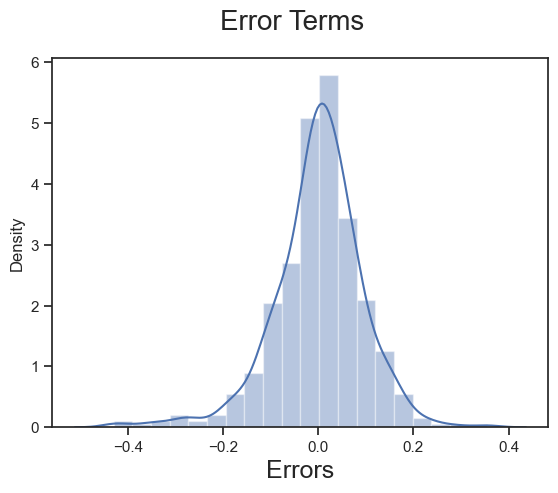

In [165]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18)                         

The error terms are fairly normally distributed and we can surely live with this. Let's now make predictions on the test-set.

### Making Predictions

We would first need to scale the test set as well. So let's start with that.

In [166]:
X_train_rfe_lm

,const,yr,temp,windspeed,season_spring,season_summer,season_winter,weekday_sunday,weathersit_Light Snow/Rain,weathersit_Mist
653,1.0,1,0.509887,0.300794,0,0,1,0,0,0
576,1.0,1,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0.442393,0.255342,1,0,0,0,0,1
728,1.0,1,0.245101,0.663106,1,0,0,1,0,0
482,1.0,1,0.395666,0.188475,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0.824514,0.355596,0,1,0,0,0,1
578,1.0,1,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0.202618,0.111379,1,0,0,0,0,0
350,1.0,0,0.248216,0.431816,0,0,1,0,0,1


In [167]:
# let's recall the set of variables which are to be scaled
var

['temp', 'hum', 'windspeed', 'cnt']

In [168]:
bs_day_test[var] = scaler.transform(bs_day_test[var])

In [169]:
# Split the 'df_test' set into X and y after scaling
y_test = bs_day_test.pop('cnt')
X_test = bs_day_test

In [170]:
X_test.head()

,yr,temp,hum,windspeed,season_spring,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Light Snow/Rain,weathersit_Mist
184,0,0.831783,0.657364,0.084219,0,0,0,1,0,0,0,0,0,0,1
535,1,0.901354,0.610133,0.153728,0,1,0,0,0,0,0,0,1,0,0
299,0,0.511964,0.837699,0.334206,0,0,1,0,0,0,1,0,0,0,1
221,0,0.881625,0.437098,0.339570,0,0,0,0,0,0,0,0,1,0,0
152,0,0.817246,0.314298,0.537414,0,1,0,0,0,0,1,0,0,0,0


In [171]:
# Let's check the list 'col2' which had the 6 variables RFE had selected
X_train_rfe_lm_col=X_train_rfe_model.columns
X_train_rfe_lm_col

Index(['yr', 'temp', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'weekday_sunday', 'weathersit_Light Snow/Rain',
       'weathersit_Mist'],
      dtype='object')

In [172]:
# Let's subset these columns and create a new dataframe 'X_test_rfe1'
X_test_rfe = X_test[X_train_rfe_lm_col]

In [173]:
# Add a constant to the test set created
X_test_rfe = sm.add_constant(X_test_rfe)
X_test_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   const                       219 non-null    float64
 1   yr                          219 non-null    int64  
 2   temp                        219 non-null    float64
 3   windspeed                   219 non-null    float64
 4   season_spring               219 non-null    uint8  
 5   season_summer               219 non-null    uint8  
 6   season_winter               219 non-null    uint8  
 7   weekday_sunday              219 non-null    uint8  
 8   weathersit_Light Snow/Rain  219 non-null    uint8  
 9   weathersit_Mist             219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(6)
memory usage: 9.8 KB


In [174]:
# Making predictions
y_pred = lr_rfe.predict(X_test_rfe)

Text(0, 0.5, 'y_pred')

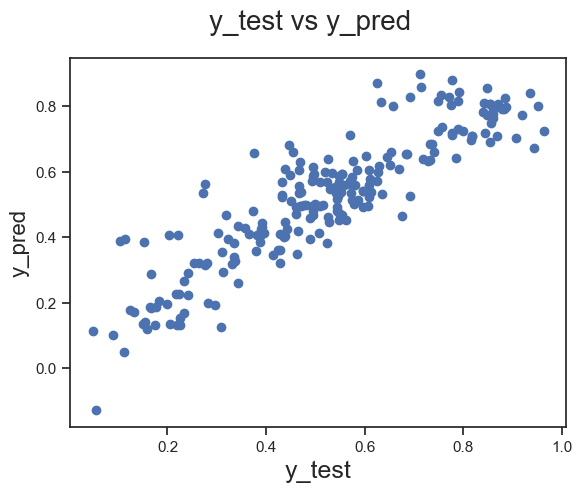

In [175]:
 # Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

We can see that the equation of our best fitted line is:

$ cnt = 0.2342  \times  yr + 0.4689  \times  temp +  (-0.1559) \times windspeed + (-0.0824) \times season_spring + 0.0388 \times season_summer + 0.0766 \times season_winter + (-0.0480) \times weekday_sunday +  (-0.2809) \times weathersit_Light Snow/Rain + (-0.0770) \times weathersit_Mist  $


From the above plot, it's evident that the model is doing well on the test set as well. Let's also check the R-squared and more importantly, the adjusted R-squared value for the test set.

In [176]:
# r2_score for 9 variables
r2_score(y_test, y_pred)

0.7968066215428509

Thus, for the model with 9 variables, the r-squared on training and test data is about 82.5% and 79.68% respectively. The adjusted r-squared on the train set is about is about 82.1%.

### Summarization
- All the VIF values and p-values seem to be in the permissible range now. Also the `Adjusted R-squared` value has dropped from `82.5%` with **10 variables** to just `82.1%` using **9 variables**. This model is explaining most of the variance without being too complex. So let's proceed with this model.
- In residual analysis using normal distribution, The error terms are fairly normally distributed and we can surely live with this. Let's now make predictions on the test-set.
- For the model with 9 variables, the r-squared on training and test data is about 82.5% and 79.68% respectively. The adjusted r-squared on the train set is about is about 82.1%.